### Student Information
Name:游雅雯 Evan Yu

Student ID:106065501

---

### Outlines of my processing steps

- Import all the library/module I need at beginin

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

---

### Import

* Import libraries and modules

In [1]:
import pandas as pd
import re
from collections import defaultdict 
from sklearn.feature_extraction.text import CountVectorizer

# my functions
import helpers.my_function as myf
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

 - Import raw data

    (1) There are only two columns in each file and the column is seperated by "\s\s\t"

In [2]:
amazon = pd.read_csv('./sentiment_labelled_sentences/amazon_cells_labelled.txt', sep='\t', header=None, engine='python',names=['text','label'])
imdb = pd.read_csv('./sentiment_labelled_sentences/imdb_labelled.txt', sep='\s\s\t', encoding='UTF-8', header=None, engine='python',names=['text','label'])
yelp = pd.read_csv('./sentiment_labelled_sentences/yelp_labelled.txt', sep='\t', header=None, engine='python',names=['text','label'])
print(amazon.shape)
print(imdb.shape)
print(yelp.shape)

(1000, 2)
(1000, 2)
(1000, 2)


---

Exercise 0
```python
#this is the same with iloc when the index is a sequence start from 0
amazon.loc[::10,:][0:10] 
imdb.loc[::10,:][0:10]
yelp.loc[::10,:][0:10]

#this supports mixed integer and label based access 
#can decide to index positionally OR via labels depending on the data type of the index.
amazon.ix[::10,['text','label']][0:10]
imdb.ix[::10,['text','label']][0:10]
yelp.ix[::10,['text','label']][0:10]
```

---

    (2) There are some weird words, seems like ASCII, in imdb_labelled.txt. Thus, I add parameter "encoding='UTF-8' to let it shows normally then replace them later.

In [3]:
for idx,s in enumerate(amazon.text):  
  string = re.sub(r"\\x\d*", " ",str(s))
  amazon.text.loc[idx] = myf.clean_str(str(string))

for idx,s in enumerate(imdb.text):  
  string = re.sub(r"\\x\d*", " ",str(s))
  imdb.text.loc[idx] = myf.clean_str(str(string))

for idx,s in enumerate(yelp.text):  
  string = re.sub(r"\\x\d*", " ",str(s))
  yelp.text.loc[idx] = myf.clean_str(str(string))

C:\Users\Nini\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



    (4) Check and remove missing

In [4]:
print("amazon:\n",amazon.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0),end='\n\n')
print("imdb:\n",imdb.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0),end='\n\n')
print("yelp:\n",yelp.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0),end='\n\n')

amazon:
 text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object

imdb:
 text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object

yelp:
 text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object



---

Exercise 1
```python
print("amazon:\n",amazon.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0),axis=1,end='\n\n')
print("imdb:\n",imdb.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0),axis=1,end='\n\n')
print("yelp:\n",yelp.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0),axis=1,end='\n\n')
```

---

    (5) Check and remove duplicate

In [5]:
print("amazon duplicated: ",sum(amazon.duplicated('text')))
print("imdb duplicated: ",sum(imdb.duplicated('text')))
print("yelp duplicated: ",sum(yelp.duplicated('text')))

amazon duplicated:  18
imdb duplicated:  4
yelp duplicated:  5


In [8]:
amazon_dup_idx=myf.get_duplicated_idx(amazon,'text')
amazon_del_dup=amazon.drop(amazon.index[amazon_dup_idx])
print(amazon_del_dup.shape)

imdb_dup_idx=myf.get_duplicated_idx(imdb,'text')
imdb_del_dup=imdb.drop(imdb.index[imdb_dup_idx])
print(imdb_del_dup.shape)

yelp_dup_idx=myf.get_duplicated_idx(yelp,'text')
yelp_del_dup=yelp.drop(yelp.index[yelp_dup_idx])
print(yelp_del_dup.shape)

(982, 2)
(996, 2)
(995, 2)


---

### Data Processing

- Descriptive statistics

Exercise 2

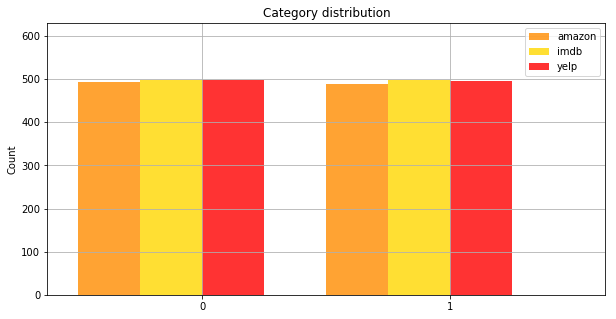

In [9]:
import matplotlib.pyplot as plt
# Setting the positions and width for the bars
pos = list(range(2)) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with amazon data,
# in position pos,
plt.bar(pos, amazon_del_dup.label.value_counts(), width, alpha=0.8,color='darkorange',label='amazon data set') 

# Create a bar with imdb data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], imdb_del_dup.label.value_counts(), width, alpha=0.8, color='gold',label='imdb data set') 

# Create a bar with imdb data,
# in position pos + some width buffer,
plt.bar([p + 2*width for p in pos], yelp_del_dup.label.value_counts(), width, alpha=0.8, color='r',label='yelp data set') 

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Category distribution')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(yelp_del_dup.label.index)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 630])

# Adding the legend and showing the plot
plt.legend(['amazon', 'imdb','yelp'], loc='upper right')
plt.grid()
plt.show()

We can find that the positive and negtive labels of three dataset are almost 1:1.
Because the quantity are almost equal, I think the neutral words maybe twice as much as the positive and negative words.
Thus, I want to get the disjoint words from positive group and negative group.

---

- Feature subset selection: I plan to apply feature selection on each of dataset and chose the top five frequency separately.

In [10]:
#For amazon dataset
#1.seperate postive and negative data
amazon_pos_idx=myf.get_pos_neg_texts(amazon_del_dup.label,1)
amazon_neg_idx=myf.get_pos_neg_texts(amazon_del_dup.label,0)
amazon_pos_text=amazon_del_dup.iloc[amazon_pos_idx]
amazon_neg_text=amazon_del_dup.iloc[amazon_neg_idx]

#2.creat countvectorize for each group
amazon_pos_CV = CountVectorizer()
amazon_pos_counts = amazon_pos_CV.fit_transform(amazon_pos_text.text)

amazon_neg_CV = CountVectorizer()
amazon_neg_counts = amazon_neg_CV.fit_transform(amazon_neg_text.text)

#3. get disjoint words
amazon_pos_set=set(amazon_pos_CV.get_feature_names())
amazon_neg_set=set(amazon_neg_CV.get_feature_names())
amazon_words_Set=amazon_pos_set^amazon_neg_set
len(amazon_words_Set)

1323

In [11]:
#For imdb dataset
#1.seperate postive and negative data
imdb_pos_idx=myf.get_pos_neg_texts(imdb_del_dup.label,1)
imdb_neg_idx=myf.get_pos_neg_texts(imdb_del_dup.label,0)
imdb_pos_text=imdb_del_dup.iloc[imdb_pos_idx]
imdb_neg_text=imdb_del_dup.iloc[imdb_neg_idx]

#2.creat countvectorize for each group
imdb_pos_CV = CountVectorizer()
imdb_pos_counts = imdb_pos_CV.fit_transform(imdb_pos_text.text)

imdb_neg_CV = CountVectorizer()
imdb_eg_counts = imdb_neg_CV.fit_transform(imdb_neg_text.text)

#3. get disjoint words
imdb_pos_set=set(imdb_pos_CV.get_feature_names())
imdb_neg_set=set(imdb_neg_CV.get_feature_names())
imdb_words_Set=imdb_pos_set^imdb_neg_set
len(imdb_words_Set)

2382

In [12]:
#For yelp dataset
#1.seperate postive and negative data
yelp_pos_idx=myf.get_pos_neg_texts(yelp_del_dup.label,1)
yelp_neg_idx=myf.get_pos_neg_texts(yelp_del_dup.label,0)
yelp_pos_text=yelp_del_dup.iloc[yelp_pos_idx]
yelp_neg_text=yelp_del_dup.iloc[yelp_neg_idx]

#2.creat countvectorize for each group
yelp_pos_CV = CountVectorizer()
yelp_pos_counts = yelp_pos_CV.fit_transform(yelp_pos_text.text)

yelp_neg_CV = CountVectorizer()
yelp_neg_counts = yelp_neg_CV.fit_transform(yelp_neg_text.text)

#3. get disjoint words
yelp_pos_set=set(yelp_pos_CV.get_feature_names())
yelp_neg_set=set(yelp_neg_CV.get_feature_names())
yelp_words_Set=yelp_pos_set^yelp_neg_set
len(yelp_words_Set)

1477

In [39]:
#creat countvectorize for amazon dataset
amazon_CV = CountVectorizer()
amazon_del_dup_counts = amazon_CV.fit_transform(amazon_del_dup.text)  

#creat countvectorize for amazon dataset
imdb_CV = CountVectorizer()
imdb_del_dup_counts = imdb_CV.fit_transform(imdb_del_dup.text)  

#creat countvectorize for amazon dataset
yelp_CV = CountVectorizer()
yelp_del_dup_counts = yelp_CV.fit_transform(yelp_del_dup.text)  


In [48]:
#get the index which are disjoint words locate
amazon_idx=myf.get_idx(amazon_words_Set,amazon_CV.get_feature_names())
imdb_idx=myf.get_idx(imdb_words_Set,imdb_CV.get_feature_names())
yelp_idx=myfget_idx(yelp_words_Set,yelp_CV.get_feature_names())

In [61]:
print(amazon_del_dup_counts[:,amazon_idx].toarray()[amazon_pos_idx,:].shape)
print(amazon_del_dup_counts[:,amazon_idx].toarray()[amazon_neg_idx,:].shape)

print(imdb_del_dup_counts[:,imdb_idx].toarray()[imdb_pos_idx,:].shape)
print(imdb_del_dup_counts[:,imdb_idx].toarray()[imdb_neg_idx,:].shape)

print(yelp_del_dup_counts[:,yelp_idx].toarray()[yelp_pos_idx,:].shape)
print(yelp_del_dup_counts[:,yelp_idx].toarray()[yelp_neg_idx,:].shape)

(489, 1323)
(493, 1323)
(498, 2382)
(498, 2382)
(499, 1477)
(496, 1477)


In [29]:
amazon_CV.get_feature_names()

['10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '18',
 '20',
 '2000',
 '2005',
 '2160',
 '24',
 '2mp',
 '325',
 '350',
 '375',
 '3o',
 '42',
 '44',
 '45',
 '4s',
 '50',
 '5020',
 '510',
 '5320',
 '680',
 '700w',
 '8125',
 '8525',
 '8530',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'absolutel',
 'absolutely',
 'ac',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessing',
 'accessory',
 'accessoryone',
 'accidentally',
 'accompanied',
 'according',
 'activate',
 'activated',
 'activesync',
 'actually',
 'ad',
 'adapter',
 'adapters',
 'add',
 'addition',
 'additional',
 'address',
 'adhesive',
 'adorable',
 'advertised',
 'advise',
 'after',
 'again',
 'against',
 'aggravating',
 'ago',
 'alarm',
 'all',
 'allot',
 'allow',
 'allowing',
 'allows',
 'almost',
 'alone',
 'along',
 'alot',
 'also',
 'although',
 'aluminum',
 'always',
 'am',
 'amazed',
 'amazing',
 'amazon',
 'amp',
 'ample',
 'an',
 'and',
 'angeles',
 'angle',
 'another',
 'answer',
 'ant